# Installing Libs

In [1]:
%pip install mlflow 
%pip install neuralforecast

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing Libs

In [1]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from sklearn.metrics import r2_score
import pickle
import seaborn as sns

# Reading Document and Starting MLFlow UI

In [3]:
mlflow.set_tracking_uri("http://localhost:5000")

In [4]:
df = pd.read_csv('/teamspace/uploads/Alcohol_Sales.csv',index_col=0,parse_dates=True)

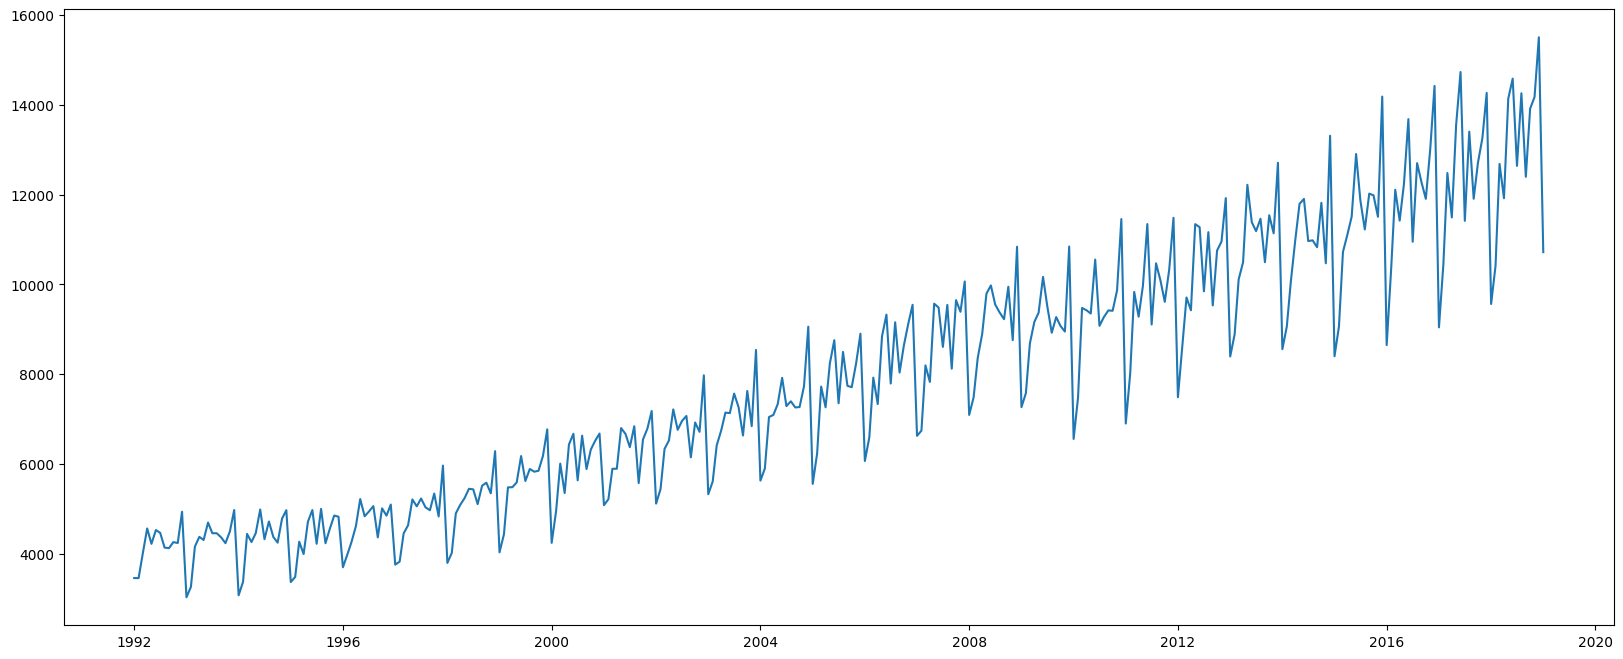

In [5]:
plt.figure(figsize=(20,8))
plt.plot(df)
plt.show()

# Train Test Split 

In [6]:
train = df[:-12]
test = df[-12:]

train = train.reset_index()
train.columns = ['ds','y']
train['unique_id'] = 'A'
test = test.reset_index()
test.columns = ['ds','y']
test['unique_id'] = 'A'

# Generate Forecast Function

In [7]:
def generate_forecast(train,test,horizon = 12, input_size=24,max_steps=50):
    model = [NBEATS(input_size=input_size, h=horizon, max_steps=max_steps)]
    nf = NeuralForecast(models=model, freq='M')
    nf.fit(df=train,verbose=False)
    Y_hat_df = nf.predict().reset_index()
    y = test['y'].values
    y_hat = Y_hat_df['NBEATS'].values
    mlflow.set_experiment("alcohol_forecast_new")
    plt.figure(figsize=(20,8))
    plt.plot(range(0,len(df)),df)
    plt.plot(range(313,325),Y_hat_df['NBEATS'].values)
    plt.savefig('forecast_image.png')
    with open('model.pkl','wb') as file:
        pickle.dump(model,file)
    with mlflow.start_run():
        print(f"R2 Score : {r2_score(y,y_hat)}")
        mlflow.log_metric("R2_Score", r2_score(y,y_hat))
        mlflow.log_param("horizon",horizon)
        mlflow.log_param("input_size",input_size)
        mlflow.log_param("max_steps",max_steps)
        mlflow.log_artifact("forecast_image.png")
        mlflow.log_artifact("model.pkl")

# Running Experiments

In [8]:
for i in [12,24,36]:
    for j in [50,100]:
        generate_forecast(train,test,12,i,j)

Seed set to 1
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
600       Non-trainable params
2.4 M     Total params
9.690     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


R2 Score : 0.9276674992967792


Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
600       Non-trainable params
2.4 M     Total params
9.690     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]